## Exploratory Data Analysis

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [3]:
# Loading the data
data = pd.read_csv("../data/sample_dataset.csv")

### Data Exploration

In [13]:
print("Column Names:", data.columns)

Column Names: Index(['Vin_A', 'Vin_B', 'temp', 'pvdd', 'cqload', 'toxe_n', 'toxm_n',
       'toxref_n', 'toxe_p', 'toxm_p', 'toxref_p', 'toxp_par', 'xj_n', 'xj_p',
       'ndep_n', 'ndep_p', 'leakage', 'delay'],
      dtype='object')


In [10]:
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,Vin_A,Vin_B,temp,pvdd,cqload,toxe_n,toxm_n,toxref_n,toxe_p,toxm_p,toxref_p,toxp_par,xj_n,xj_p,ndep_n,ndep_p,leakage,delay
0,0.0,0.0,12.255347,1.046000,3.194341,8.359237e-10,9.751981e-10,9.483550e-10,7.708359e-10,9.678138e-10,9.827984e-10,6.687324e-10,1.188720e-08,1.225810e-08,6.434348e+18,2.526877e+18,1.671074e-08,9.301030
1,1.0,1.0,4.924177,0.936902,2.301869,7.840837e-10,8.856073e-10,9.837999e-10,9.704402e-10,7.968985e-10,9.904218e-10,6.595852e-10,1.217329e-08,1.392668e-08,5.831892e+18,2.989702e+18,1.539794e-08,6.059454
2,0.0,0.0,-23.292296,0.969328,4.822848,7.920952e-10,8.096483e-10,8.776477e-10,8.233241e-10,1.000402e-09,8.561066e-10,6.296763e-10,1.349026e-08,1.423462e-08,6.796714e+18,2.875922e+18,1.485610e-08,3.334155
3,0.0,1.0,54.308001,1.032656,1.102702,8.058905e-10,9.471070e-10,8.334514e-10,8.321201e-10,9.741789e-10,8.188342e-10,6.538462e-10,1.558112e-08,1.379636e-08,6.093552e+18,2.898569e+18,1.494352e-08,8.825231
4,0.0,1.0,30.792349,0.996418,2.943404,8.117279e-10,8.663442e-10,8.409870e-10,8.174663e-10,9.933887e-10,8.086819e-10,6.320664e-10,1.203477e-08,1.383662e-08,6.309340e+18,2.610940e+18,1.475817e-08,6.188029


In [11]:
# Checking data types and missing values
print("\nDataset information:")
data.info()



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Vin_A     10000 non-null  float64
 1   Vin_B     10000 non-null  float64
 2   temp      10000 non-null  float64
 3   pvdd      10000 non-null  float64
 4   cqload    10000 non-null  float64
 5   toxe_n    10000 non-null  float64
 6   toxm_n    10000 non-null  float64
 7   toxref_n  10000 non-null  float64
 8   toxe_p    10000 non-null  float64
 9   toxm_p    10000 non-null  float64
 10  toxref_p  10000 non-null  float64
 11  toxp_par  10000 non-null  float64
 12  xj_n      10000 non-null  float64
 13  xj_p      10000 non-null  float64
 14  ndep_n    10000 non-null  float64
 15  ndep_p    10000 non-null  float64
 16  leakage   10000 non-null  float64
 17  delay     10000 non-null  float64
dtypes: float64(18)
memory usage: 1.4 MB


In [12]:
print("\nSummary statistics:")
data.describe()


Summary statistics:


,Vin_A,Vin_B,temp,pvdd,cqload,toxe_n,toxm_n,toxref_n,toxe_p,toxm_p,toxref_p,toxp_par,xj_n,xj_p,ndep_n,ndep_p,leakage,delay
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000
mean,0.498700,0.499300,35.815378,1.000010,2.498580,8.862034e-10,8.877987e-10,8.874542e-10,8.868030e-10,8.872650e-10,8.858227e-10,6.550460e-10,1.377258e-08,1.374014e-08,6.586578e+18,2.799053e+18,1.561792e-08,5.019825
std,0.500023,0.500025,52.073019,0.057355,1.442083,7.347818e-11,7.323869e-11,7.306511e-11,7.263589e-11,7.407994e-11,7.308449e-11,4.900640e-11,1.182182e-09,1.170875e-09,4.864534e+17,2.066577e+17,7.348762e-10,2.874632
min,0.000000,0.000000,-54.971606,0.900010,0.010028,7.600043e-10,7.600021e-10,7.600686e-10,7.600330e-10,7.600327e-10,7.600075e-10,5.700166e-10,1.173011e-08,1.173023e-08,5.739165e+18,2.435011e+18,1.434515e-08,0.001727
25%,0.000000,0.000000,-9.289756,0.950750,1.241818,8.220451e-10,8.252669e-10,8.244867e-10,8.240076e-10,8.219320e-10,8.221996e-10,6.119282e-10,1.274598e-08,1.273022e-08,6.161787e+18,2.620467e+18,1.498205e-08,2.546916
50%,0.000000,0.000000,36.061420,1.000414,2.505151,8.854042e-10,8.885470e-10,8.880692e-10,8.868048e-10,8.880764e-10,8.861363e-10,6.555227e-10,1.377452e-08,1.372298e-08,6.590086e+18,2.801035e+18,1.562834e-08,5.035908
75%,1.000000,1.000000,81.166260,1.048935,3.738110,9.506212e-10,9.513753e-10,9.511272e-10,9.499468e-10,9.527845e-10,9.485384e-10,6.974913e-10,1.480899e-08,1.474516e-08,7.011027e+18,2.979404e+18,1.626046e-08,7.475131
max,1.000000,1.000000,124.986469,1.099980,4.998949,1.013993e-09,1.013985e-09,1.013921e-09,1.013968e-09,1.013998e-09,1.013994e-09,7.399618e-10,1.579944e-08,1.579968e-08,7.418842e+18,3.150992e+18,1.688664e-08,9.996660


####  Observations and Inferences

### Data Cleaning

In [14]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Check for duplicates
print("Duplicates:", data.duplicated().sum())


Missing Values:
 Vin_A       0
Vin_B       0
temp        0
pvdd        0
cqload      0
toxe_n      0
toxm_n      0
toxref_n    0
toxe_p      0
toxm_p      0
toxref_p    0
toxp_par    0
xj_n        0
xj_p        0
ndep_n      0
ndep_p      0
leakage     0
delay       0
dtype: int64
Duplicates: 0


### Preprocessing

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming 'leakage' and 'delay' are the target variables
X = data.drop(columns=['leakage', 'delay'])
y = data[['leakage', 'delay']]

# Identify numerical and categorical columns
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessing steps for numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Replace missing values with mean
    ('scaler', StandardScaler())  # Scale features to have mean=0 and variance=1
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))  # Replace missing values with most frequent value
    
])

# Combine preprocessing steps for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to X
X_preprocessed = preprocessor.fit_transform(X)

# Convert preprocessed data to DataFrame
X_preprocessed = pd.DataFrame(X_preprocessed, columns=numeric_features.tolist() + categorical_features.tolist())

# Display preprocessed data
print("\nPreprocessed data:")
X_preprocessed.head()



Preprocessed data:


,Vin_A,Vin_B,temp,pvdd,cqload,toxe_n,toxm_n,toxref_n,toxe_p,toxm_p,toxref_p,toxp_par,xj_n,xj_p,ndep_n,ndep_p,temp_bins
0,-0.997403,-0.998601,-0.452465,0.801884,0.482494,-0.684316,1.193409,0.833556,-1.596634,1.087377,1.326965,0.279293,-1.594909,-1.265823,-0.312955,-1.317103,-0.721307
1,1.002603,1.001401,-0.593258,-1.100359,-0.136414,-1.389866,-0.029923,1.318694,1.151515,-1.219912,1.431279,0.092629,-1.352895,0.159325,-1.551482,0.922580,-0.721307
2,-0.997403,-0.998601,-1.135149,-0.534981,1.611824,-1.280827,-1.067119,-0.134223,-0.873977,1.527302,-0.406620,-0.517707,-0.238826,0.422336,0.431996,0.371980,-1.428817
3,-0.997403,1.001401,0.355146,0.569224,-0.968007,-1.093072,0.809835,-0.739142,-0.752874,1.173304,-0.916636,-0.024484,1.529905,0.048014,-1.013562,0.481575,0.693714
4,-0.997403,1.001401,-0.096466,-0.062635,0.308475,-1.013623,-0.292954,-0.636001,-0.954627,1.432629,-1.055554,-0.468933,-1.470078,0.082401,-0.569945,-0.910307,-0.013796


### Dimensionality Reduction

#### Principal Component Analysis (PCA): Reduce the dimensionality of the dataset while preserving most of the variance

In [75]:
from sklearn.decomposition import PCA

# Number of components = 4
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_preprocessed)
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Print explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

pca_df.head()

Explained Variance Ratio:
[0.1167815  0.06234398 0.06088082 0.06080223]


,PC1,PC2,PC3,PC4
0,0.877029,0.487148,0.325862,0.387797
1,0.771328,-0.516975,0.499400,0.796609
2,1.787516,0.021546,0.344317,-0.054070
3,-0.701441,0.047007,-0.247568,0.885224
4,0.060855,-0.599241,-0.707273,1.180628


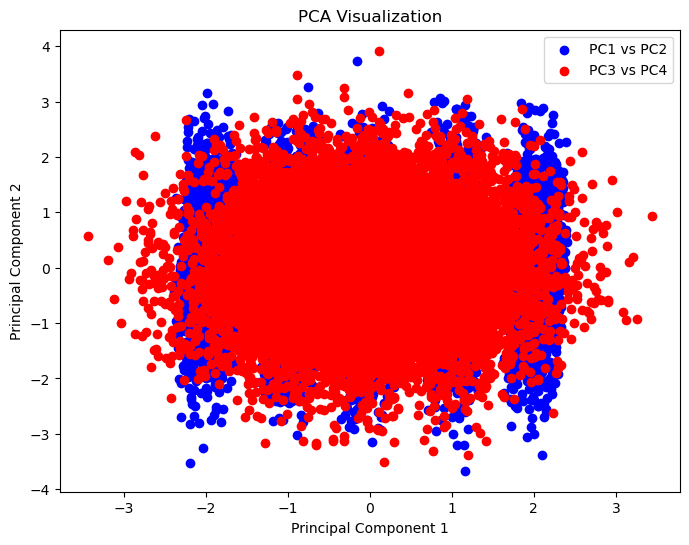

In [86]:
import matplotlib.pyplot as plt

# Visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', label='PC1 vs PC2')
plt.scatter(pca_df['PC3'], pca_df['PC4'], c='red', label='PC3 vs PC4')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.legend()
plt.show()


#### t-Distributed Stochastic Neighbor Embedding (t-SNE): Reduce the dimensionality for visualization

In [76]:
from sklearn.manifold import TSNE

# Number of components = 2, perplexity = 5
tsne = TSNE(n_components=2, perplexity=5)

# Fit t-SNE, transform the scaled data
tsne_result = tsne.fit_transform(X_preprocessed)
tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])

tsne_df.head()


,t-SNE1,t-SNE2
0,-1.733025,-76.977188
1,22.003067,96.811981
2,-20.709435,-81.993645
3,41.923786,-13.303556
4,57.447372,44.702850


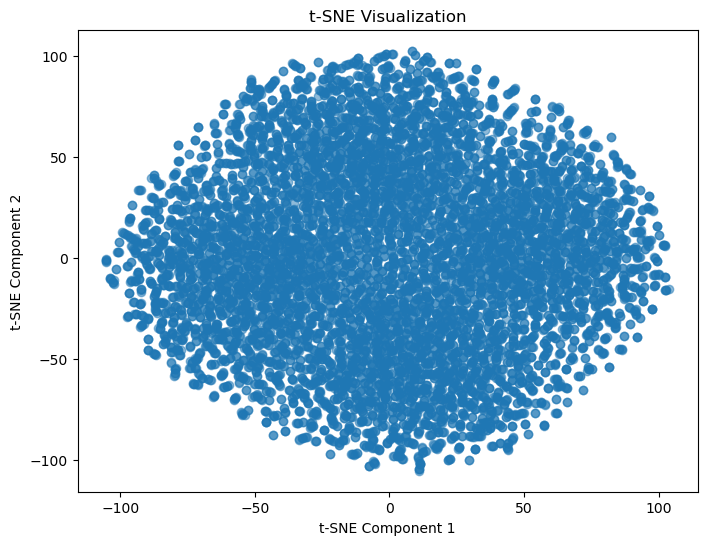

In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.show()


### Pattern Mining

#### Explore patterns in the data using Association Rule Mining (Apriori Algorithm). ------> need to recheck

To preprocess the data for association rule mining with the Apriori algorithm, we need to convert the continuous variables into categorical ones. A simple approach using binning to discretize continuous variables and encoding categorical variables into binary format is used:

In [78]:
from sklearn.preprocessing import KBinsDiscretizer

# Apply binning to PCA output
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
pca_binned = kbins.fit_transform(pca_df)
pca_binned_df = pd.DataFrame(data=pca_binned, columns=pca_df.columns)

# Pattern mining with Apriori algorithm
frequent_itemsets = apriori(pca_binned_df, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Print association rules
print("\nAssociation Rules:")
print(rules)


/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 3.0

In [ ]:
import matplotlib.pyplot as plt

# Visualize frequent itemsets
plt.figure(figsize=(10, 6))
plt.barh(range(len(frequent_itemsets)), frequent_itemsets['support'], align='center')
plt.yticks(range(len(frequent_itemsets)), frequent_itemsets['itemsets'])
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Itemsets')
plt.show()

# Visualize association rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.show()


### Regression Analysis


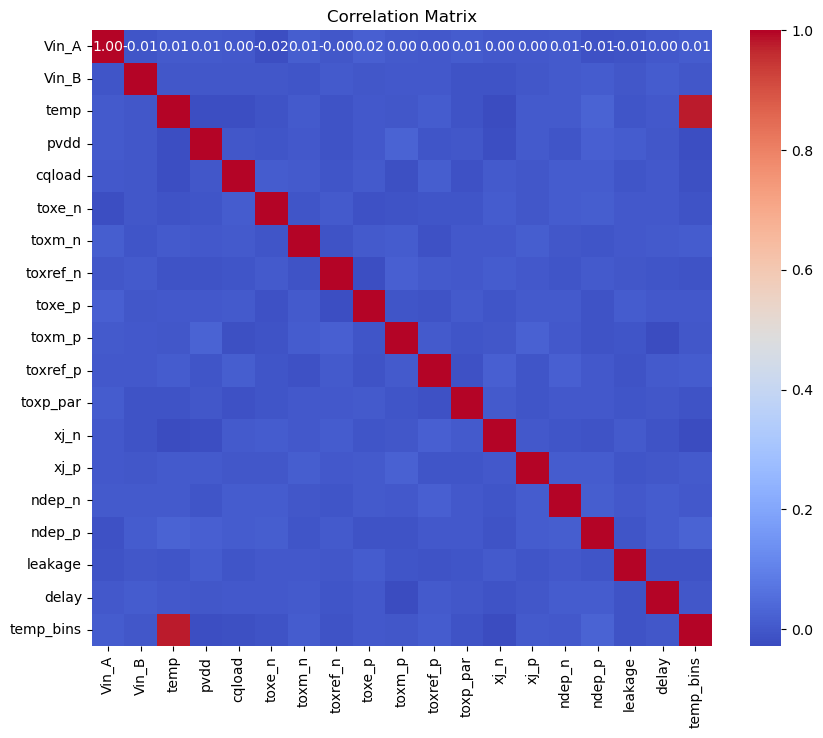

In [79]:
# Correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [80]:

# Multicollinearity test

# Find variables with high correlation
threshold = 0.8
high_correlation_vars = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_correlation_vars.add(colname)

# Drop columns with high correlation
data.drop(high_correlation_vars, axis=1, inplace=True)

print("Shape of the dataset after handling multicollinearity:", data.shape)

Shape of the dataset after handling multicollinearity: (10000, 18)


A Decision Tree Regressor model is trained on the training data (X_train, y_train) to analyze the importance of each feature in predicting the target variables.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Separate features and target variable
X = pca_df
y = data[['leakage', 'delay']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Importance Analysis with Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
feature_importance = dt_regressor.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = X_train.columns[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

print("Feature Importance:")
for feature, importance in zip(sorted_features, sorted_importance):
    print(f"{feature}: {importance}")


Feature Importance:
PC2: 0.25381906771966717
PC4: 0.2502742291243226
PC3: 0.24945009280256178
PC1: 0.24645661035344854


Train R^2 Score: 1.0
Test R^2 Score: -1.0227109502745666


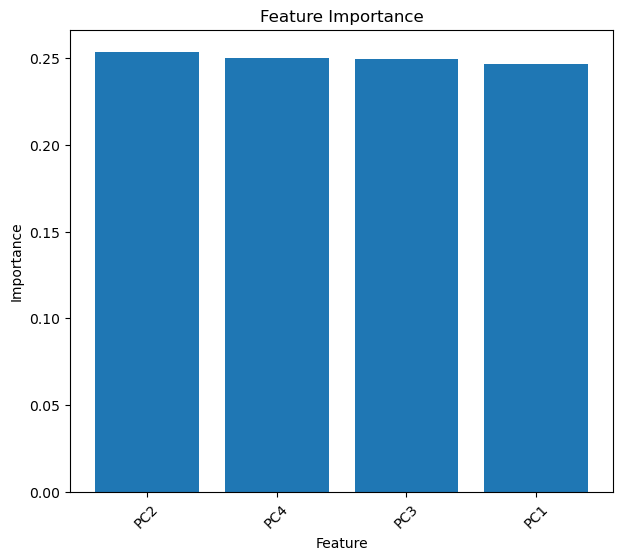

In [82]:
# Evaluate the model
train_score = dt_regressor.score(X_train, y_train)
test_score = dt_regressor.score(X_test, y_test)
print(f"Train R^2 Score: {train_score}")
print(f"Test R^2 Score: {test_score}")

# Plot Feature Importance
plt.figure(figsize=(7, 6))
plt.bar(sorted_features, sorted_importance)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()


In [83]:
# Print the data after removing unnecessary columns
print("Data after removing unnecessary columns:")
X_train.head()

Data after removing unnecessary columns:


,PC1,PC2,PC3,PC4
9254,1.793405,-1.623590,-0.867154,0.362159
1561,1.142536,0.959924,0.103492,1.563636
1670,0.774461,-1.464851,-1.194062,0.716992
6087,-1.969084,0.804237,-1.190668,0.213430
6669,0.802138,0.992288,-0.482628,-0.969962
